In [90]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)



In [45]:
# Lendo os dados
Base_Dados = pd.read_csv('dengue-dataset.csv', encoding='latin-1')

# Verificando
Base_Dados.head() 

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


In [46]:
Base_Dados.shape

(204, 6)

In [47]:
# Estatiticas
Base_Dados.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.000000,196.000000,204.000000,204.000000,204.000000
mean,357.539216,116.650000,22.200980,17.679412,25.565196
std,1741.814759,96.631613,2.399363,3.336316,2.249864
min,0.000000,0.800000,16.400000,8.200000,19.100000
25%,6.000000,43.850000,20.100000,15.075000,23.800000
50%,17.500000,86.650000,22.700000,18.150000,26.200000
75%,84.500000,177.925000,24.225000,20.400000,27.200000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


In [48]:
# Módulo 1 - Medidas de tendência central
# Media aritmética desta coluna petal_length
Base_Dados['temperatura-media'].mean()

22.20098039215686

In [49]:
# Moda a que tem as maiores frequencia retornando duas moda
Base_Dados['temperatura-media'].mode()

0    24.7
Name: temperatura-media, dtype: float64

In [50]:
# Mediana é que ocupa o valor central de nossos dados
Base_Dados['casos-confirmados'].median()

17.5

In [51]:
# Módulo 2 - Mediads Separatrizes - fazem a divisão de nosso conjunto de dados
Base_Dados['casos-confirmados'].describe()

count      204.000000
mean       357.539216
std       1741.814759
min          0.000000
25%          6.000000
50%         17.500000
75%         84.500000
max      20428.000000
Name: casos-confirmados, dtype: float64

<Axes: >

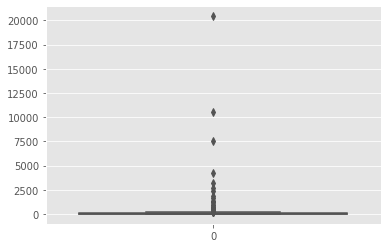

In [52]:
#       25%        50%        75%        max
# 4.3 <----> 5.1 <----> 5.8 <----> 6.4 <-----> 7.9
# 1ºquartil= Q1=25% 
# 2ºquartil= Q2=Md = 50%
# 3ºquartil= Q3 = 75%
# vamos utilizar o grafico do boxplot para melhor visualização
sns.boxplot( Base_Dados['casos-confirmados'] )     

In [53]:
# Módulo 3 - Medidas de dispersão - medidas de tendência central 
# Amplitude Total
Base_Dados['casos-confirmados'].max() - Base_Dados['casos-confirmados'].min()

20428

In [54]:
# Amplitude Interquartilica
Base_Dados['casos-confirmados'].describe()

count      204.000000
mean       357.539216
std       1741.814759
min          0.000000
25%          6.000000
50%         17.500000
75%         84.500000
max      20428.000000
Name: casos-confirmados, dtype: float64

In [55]:
Base_Dados['casos-confirmados'].describe()[6:7]

75%    84.5
Name: casos-confirmados, dtype: float64

In [56]:
Base_Dados['casos-confirmados'].describe()[6:7].values

array([84.5])

In [57]:
Base_Dados['casos-confirmados'].describe()[6:7].values - Base_Dados['casos-confirmados'].describe()[4:5].values

array([78.5])

In [58]:
# Amplitude semi-interquartilica é anterior dividido por 2
(Base_Dados['casos-confirmados'].describe()[6:7].values - Base_Dados['casos-confirmados'].describe()[4:5].values) / 2

array([39.25])

In [59]:
# Variância
Base_Dados['casos-confirmados'].var()

3033918.6536269668

In [60]:
# Desvio padrão
Base_Dados['casos-confirmados'].std()

1741.8147587005246

In [61]:
# Modulo 3 Medidas de dispersão
#Amplitude total
Base_Dados['casos-confirmados'].max() - Base_Dados['casos-confirmados'].min()

20428

In [62]:
#Amplitude Interquartilica  é a diferença entre o terceiro e o primeiro quartil
Base_Dados['casos-confirmados'].describe()[6:7].values - Base_Dados['casos-confirmados'].describe()[4:5].values

array([78.5])

In [63]:
#Amplitude semi-interquartilica é a média aritmética da diferença entre a mediana e os quartis

(Base_Dados['casos-confirmados'].describe()[6:7].values - Base_Dados['casos-confirmados'].describe()[4:5].values) / 2

array([39.25])

In [64]:
# Variância uma medida de dispersão que mostra quão distates os valores estão da média
Base_Dados['casos-confirmados'].var()

3033918.6536269668

In [65]:
#Desvio padrão é simplesmente o resultado positivo da raiz quadrada da variância
Base_Dados['casos-confirmados'].std() # praticamente raiz quadrada variançia

1741.8147587005246

In [66]:
#Medidas de Assimetria é distribuição deos dados
# Simpetrica se média = mediana = moda ou As = 0
# Assimpetrica negativa se média < e igual mediana < e igual média ou As > 0
# Assimétrica positiva se moda < igual mediana < e igual média ou As > 0
Base_Dados['casos-confirmados'].skew()

9.03707086272286

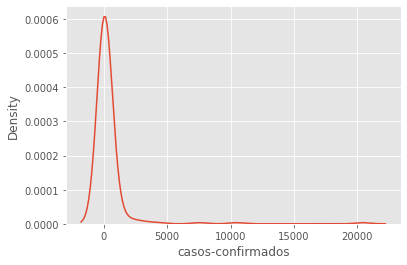

In [67]:
sns.kdeplot(Base_Dados['casos-confirmados']);

In [68]:
#Medidas de Curtose é o grau de achatamento da distribuição 
#Leptocúrtica: qdo a distrib.apresenta uma cruva mais longo de frequencia bastante fechada, com os dados fortemente concentrados em torno de seu centro, k<0,263
#Mesocúrtica:quando os dados estão razoavelmente concentrados em torno de seu centro, K=0,263
#Platicúrtica: quando a distribuição apresenta uma curva de frequência mais aberta, com os dados fracamente concentrados em torno de seu centro, K>0,163
Base_Dados['casos-confirmados'].kurtosis()

93.86728624693062

In [69]:
#Modulo 4 - Correlação
# correlação de Pearson
#o coeficiente pode ter um intervalo de valores de +1 a -1 um valor de 0 indica que não fá associação entre as duas variáveis. um valor maior qu e 0 indica uma associação positiva
Base_Dados.corr()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
casos-confirmados,1.000000,-0.083691,0.041172,0.037013,0.026151
chuva,-0.083691,1.000000,0.492732,0.487643,0.393733
temperatura-media,0.041172,0.492732,1.000000,0.885326,0.893091
temperatura-mininima,0.037013,0.487643,0.885326,1.000000,0.685034
temperatura-maxima,0.026151,0.393733,0.893091,0.685034,1.000000


<Axes: >

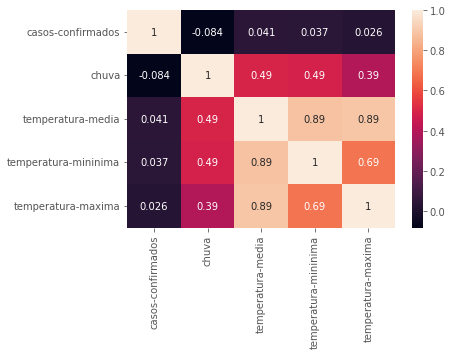

In [70]:
sns.heatmap( Base_Dados.corr(), annot=True )

<Axes: xlabel='temperatura-mininima', ylabel='temperatura-maxima'>

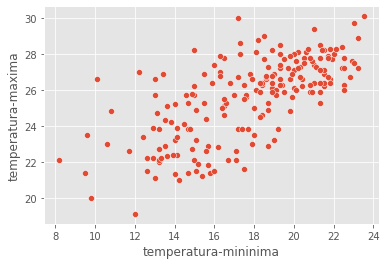

In [71]:
sns.scatterplot( data=Base_Dados, x='temperatura-mininima', y='temperatura-maxima')

In [72]:
#Correlação de Spearman 
#uma vez que a correlação de Spearman segue uma lógica monotética, enão tem pressuposto lineares como na correlação de Pearson, é possivel utilizar o rs para relações não lineares
Base_Dados.corr('spearman')

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
casos-confirmados,1.000000,0.042668,0.197770,0.216279,0.057121
chuva,0.042668,1.000000,0.552947,0.545271,0.427294
temperatura-media,0.197770,0.552947,1.000000,0.893418,0.856656
temperatura-mininima,0.216279,0.545271,0.893418,1.000000,0.677492
temperatura-maxima,0.057121,0.427294,0.856656,0.677492,1.000000


<Axes: >

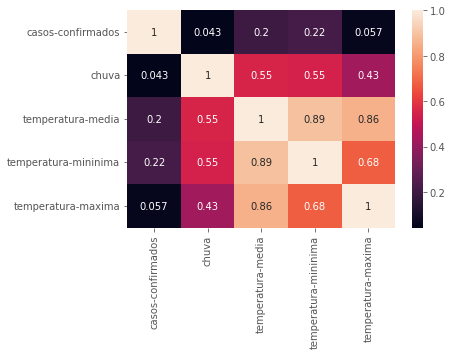

In [73]:
sns.heatmap( Base_Dados.corr( 'spearman' ), annot=True)

<Axes: xlabel='temperatura-mininima', ylabel='temperatura-maxima'>

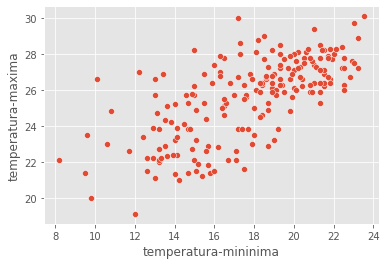

In [74]:
sns.scatterplot( data=Base_Dados, x='temperatura-mininima', y='temperatura-maxima')

In [75]:
# Nulos
Base_Dados.isnull().sum()

data                    0
casos-confirmados       0
chuva                   8
temperatura-media       0
temperatura-mininima    0
temperatura-maxima      0
dtype: int64

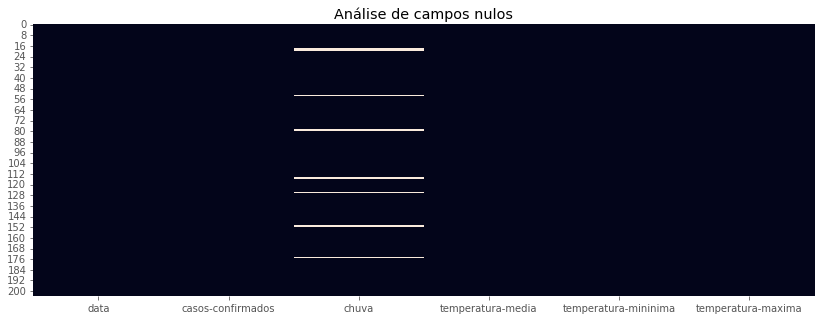

In [76]:
# Nulos Plot
plt.figure( figsize=(14,5) )
plt.title('Análise de campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [77]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 196 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB


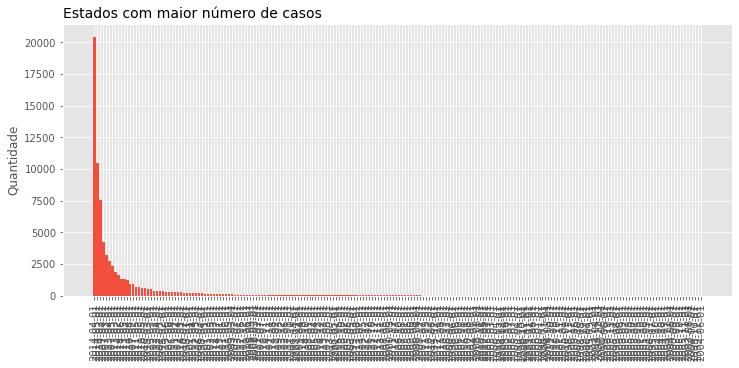

In [78]:
# analise por caso Dengue
Analise_03 = Base_Dados.groupby( by=['data'] ).sum().reset_index()[['data', 'casos-confirmados']].sort_values( 'casos-confirmados', ascending=False )
Analise_03.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'Estados com maior número de casos', loc='left', fontsize=14 )

# Grafico
plt.bar( Analise_03.data, Analise_03['casos-confirmados'], color='#f44e3f' )

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90 );

In [79]:
# Campos unicos

Base_Dados.nunique()

data                    204
casos-confirmados       100
chuva                   186
temperatura-media        83
temperatura-mininima    102
temperatura-maxima       77
dtype: int64

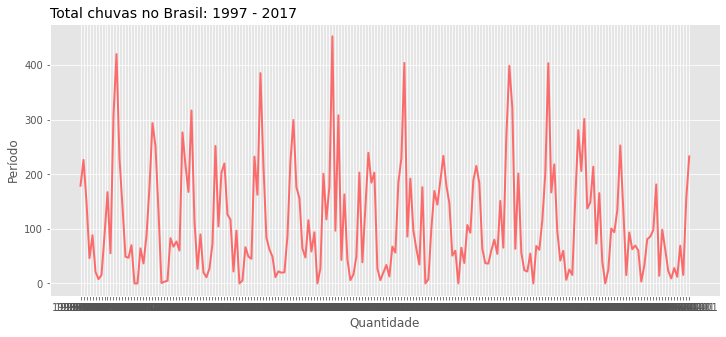

In [80]:
# analise por data dos chuvas
Analise = Base_Dados.groupby( by=['data'] ).sum().reset_index()

Analise.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

# Grafico
plt.title( 'Total chuvas no Brasil: 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Analise, x='data', y='chuva', estimator='sum', lw=2, color='#ff5555', alpha=0.85 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

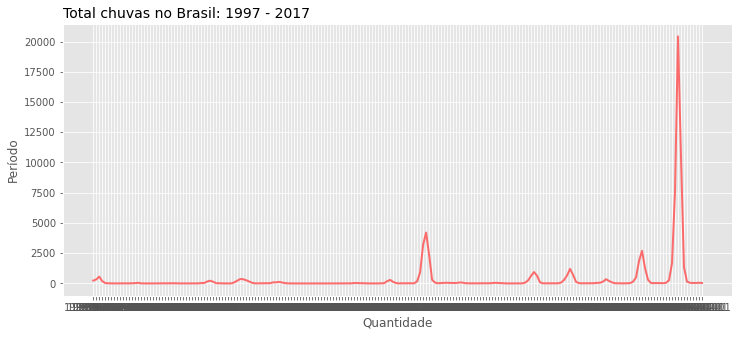

In [81]:
# analise por data dos chuvas
Analise = Base_Dados.groupby( by=['data'] ).sum().reset_index()

Analise.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

# Grafico
plt.title( 'Total chuvas no Brasil: 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Analise, x='data', y='casos-confirmados', estimator='sum', lw=2, color='#ff5555', alpha=0.85 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

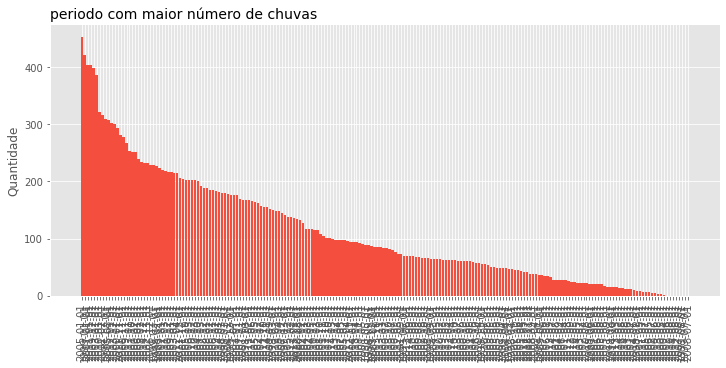

In [82]:
# analise por ano dos incendios
Analise_04 = Base_Dados.groupby( by=['data'] ).sum().reset_index()[['data', 'chuva']].sort_values( 'chuva', ascending=False )
Analise_04.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'periodo com maior número de chuvas', loc='left', fontsize=14 )

# Grafico
plt.bar( Analise_04.data, Analise_04['chuva'], color='#f44e3f' )

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90 );

Text(0, 0.5, 'Dia')

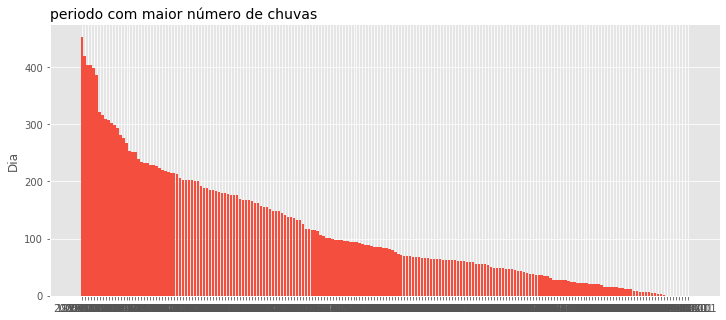

In [83]:
# analise por ano dos incendios
Analise_05 = Base_Dados.groupby( by=['data'] ).sum().reset_index()[['data', 'chuva']].sort_values( 'chuva', ascending=False )
Analise_05.head()

#  Tamanho do titulo
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'periodo com maior número de chuvas', loc='left', fontsize=14 )

# Grafico
plt.bar( Analise_05.data, Analise_05.chuva, color='#f44e3f' )

# Labels
plt.ylabel('Dia')

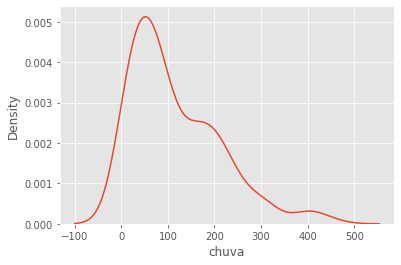

In [84]:
df_campinas = pd.read_csv('dengue-dataset.csv') 
#ploting the volume of rain in each month since 1998
fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Scatter(x = df_campinas['data'],y = df_campinas['chuva'],name = 'Chuva mm/ mês'),secondary_y = False)
fig1.add_trace(go.Bar(x = df_campinas['data'],y = df_campinas['casos-confirmados'],name = 'Casos Dengue'),secondary_y = True)
fig1.update_layout(
    yaxis = dict(
        title = 'Chuva mm'
    ),
    yaxis2 = dict(
        title  = 'Casos'
    ),
    title_text="Chuva e casos em Campinas/SP"
)
sns.kdeplot(df_campinas['chuva']);

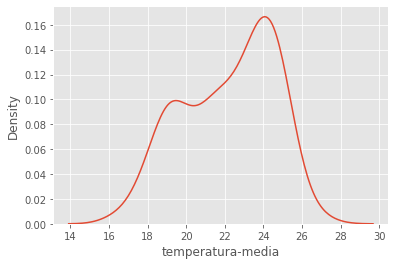

In [85]:
#fazendo o mesmo processo com temperatura média
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x = df_campinas['data'],y = df_campinas['temperatura-media'],name = 'Temperatura média'),secondary_y = False)
fig2.add_trace(go.Bar(x = df_campinas['data'],y = df_campinas['casos-confirmados'],name = 'Casos Dengue'),secondary_y = True)
fig2.update_layout(
    yaxis = dict(
        title = 'Temperatura média C'
    ),
    yaxis2 = dict(
        title  = 'Casos'
    ),
    title_text="Temperatura média e casos em Campinas/SP"
)
sns.kdeplot(df_campinas['temperatura-media']);

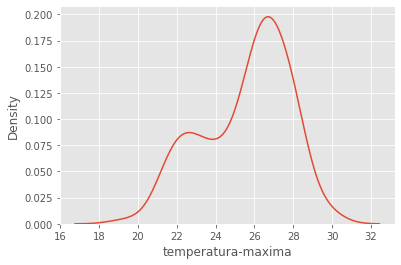

In [86]:
#analisando temperatura máxima 
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x = df_campinas['data'],y = df_campinas['temperatura-maxima'],name = 'Temperatura méd'),secondary_y = False)
fig2.add_trace(go.Bar(x = df_campinas['data'],y = df_campinas['casos-confirmados'],name = 'Casos Dengue'),secondary_y = True)
fig2.update_layout(
    yaxis = dict(
        title = 'Temperatura máxima'
    ),
    yaxis2 = dict(
        title  = 'Casos'
    ),
    title_text="Temperatura máxima e casos em Campinas/SP"
)
sns.kdeplot(df_campinas['temperatura-maxima']);

Text(0, 0.5, 'Chuva com os casos de dengue ano a ano')

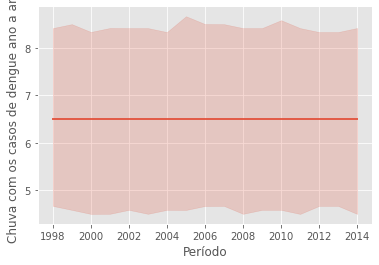

In [91]:
datas_dt = []
datas = np.unique(df_campinas['data'])
for data in datas :
    datas_dt.append(datetime.strptime(data,'%Y-%m-%d'))

df_campinas['year'] = pd.DatetimeIndex(df_campinas['data']).year
df_campinas['month'] = pd.DatetimeIndex(df_campinas['data']).month
anos = range(1998,2015)
#analisando a chuva com os casos de dengue ano a ano.
for ano in anos:
    fig = go.Figure()
    dados = df_campinas.loc[df_campinas['year']==ano]
    fig.add_trace(go.Bar(x = dados['data'],y= dados['chuva'],name= 'chuva mm/mês'))
    fig.add_trace(go.Scatter(x=dados['data'],y = dados['casos-confirmados'],yaxis='y2',name = 'casos de dengue' ))
    fig.add_trace(go.Scatter(x = dados['data'],y = dados['temperatura-media'],yaxis='y3',name = 'temperatura media'))
    fig.add_trace(go.Scatter(x = dados['data'],y = dados['temperatura-maxima'],yaxis = 'y3',name = 'temperatura maxima',mode = 'markers'))
    fig.add_trace(go.Scatter(x = dados['data'],y = dados['temperatura-mininima'],yaxis = 'y3',name = 'temperatura minima',mode = 'markers'))
    
    fig.update_layout(
        xaxis  = dict(
        domain = [0.15,0.95]),
        yaxis = dict(
        title = 'Chuva mm'),
        yaxis2=dict(
        title="Casos",
        anchor="free",
        overlaying="y",
        side="left",
        position=0
    ),
        yaxis3=dict(
        title="Temperatura",
        anchor="free",
        overlaying="y",
        side="right",
        position=1),
        title_text = f"Dados no ano de {ano} em Campinas/SP ",
        width = 650)

# Plot
sns.lineplot(data=df_campinas, x='year', y='month', lw=2, alpha=0.85)

# Labels
plt.xlabel('Período')
plt.ylabel('Chuva com os casos de dengue ano a ano')
